In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('E:/PERSONAL DATA PROJECT/REFDATA SET/OWN DATA SET FOR WORK/CO2 Emissions_Canada.csv')

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


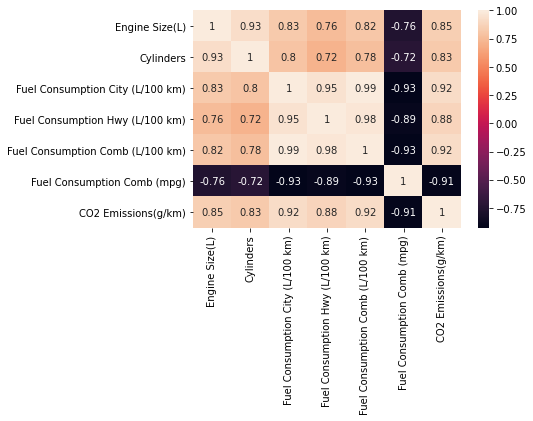

In [7]:
sns.heatmap(df.corr(),annot=True);

In [8]:
df = df.dropna(axis=0)

In [9]:
df_trans=pd.get_dummies(df)
X = df_trans.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'],axis=1)
y=df_trans['Fuel Consumption Comb (mpg)']
features = X.columns

In [10]:
df_trans

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 
# StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.
# StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1

In [12]:
s = StandardScaler()
X = s.fit_transform(X)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

# Prediction and Evaluate the Model Performance

In [14]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [15]:
ypred_null = y_train.mean()

# Using K-Neighbours Regressor

In [17]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [20]:
y_pred = knn.predict(X_test)

# Using Random Forest Calassification

In [21]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred2=y_pred = rf.predict(X_test)

# Linear Regression

In [22]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

# Lasso Regression

In [23]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred4 = lasso.predict(X_test)

In [24]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,0.0335582
MLR,2.39094
RF,0.0335582
Lasso,0.881414
NULL,27.5256


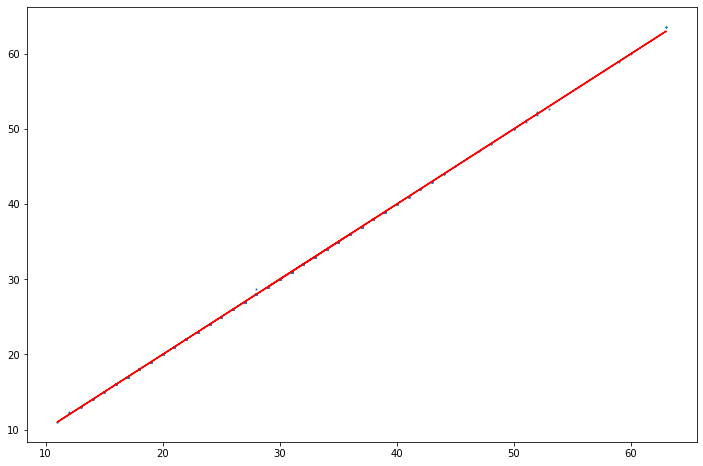

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test,y_test,color='red')

C:\Users\TUHIN\AppData\Local\New folder\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


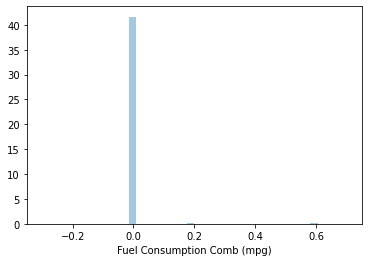

In [26]:
sns.distplot(y_pred-y_test)

In [27]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))